<a href="https://colab.research.google.com/github/sayem1997/AIPII/blob/master/Assignments/Lab_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to AI Programming II:: Assignment #3 (Lab)  -- Total: 50 pts(Each points are 10 pts.)

### Write your information in below. 
### Student ID:                        
### Name: 

In [1]:
# import tensorflow & keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#Download mnist data from MNIST server
img_rows = 28
img_cols = 28
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


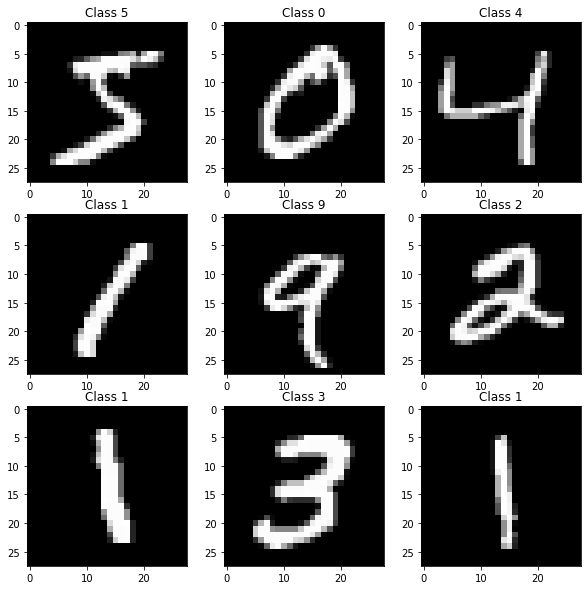

In [3]:
# Visualize images of the MNIST dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [4]:
# check the shape of training data
print(x_train.shape)
# check the shape of test data
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
# flatten training and test datasets to 1-d
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [6]:
x_train[0].shape, x_test[0].shape

((784,), (784,))

In [7]:
# observe the shapes of training data after the reshape
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [0]:
# 1,2,3,... 10 :One Hot coding
num_classes = 10
from keras.utils import np_utils
# reshape labels categorically
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
print(y_train[0])
print(y_test[0])
y_train.shape,y_test.shape
print(x_train.shape[1])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
784


In [0]:
def make_model(num_layers):
    model= Sequential()
    if num_layers == 0:
        model.add(Dense(output_dim= num_classes, input_dim = x_train.shape[1], activation='softmax'))
        model.compile(loss='mse', optimizer = 'sgd', metrics=['accuracy'])
        return model
    
    for i in range(num_layers):
        if i == 0:
            model.add(Dense(output_dim = 32, input_dim = x_train.shape[1], activation='sigmoid'))
        else:
            model.add(Dense(output_dim = 10, activation='sigmoid'))
    model.add(Dense(output_dim = num_classes, activation="softmax"))
    model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
    return model

In [11]:
(x_train.shape[1],)
#num_hidden_neurons = 32
model = make_model(num_layers=1)

model.summary()
history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_data  =(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="sigmoid", units=32)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  del sys.path[0]


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.0941 - accuracy: 0.1125 - val_loss: 0.0926 - val_accuracy: 0.1154
Epoch 2/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0919 - accuracy: 0.1188 - val_loss: 0.0914 - val_accuracy: 0.1258
Epoch 3/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0910 - accuracy: 0.1347 - val_loss: 0.0907 - val_accuracy: 0.1450
Epoch 4/5
60000/60000 [=

In [12]:
#evaluate the test loss

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08976044759750366
Test accuracy: 0.18289999663829803


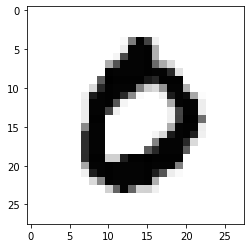

The Answer is  [0]


In [13]:
# test the model through visually debugging the inputs,,  run > twice to see the image
# index of your input to test
n = 3
# see the image by plotting
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')  
plt.show()

# your model's prediction, is the output correct?
print('The Answer is ', model.predict_classes(x_test[n].reshape((1, 28* 28) ) ) )


## 1. Report the result of the test loss & accuracy, when we set the dimension(neurons) of hidden layer to (64, 128, 256) with one hidden layer.
## *** Default condition : refer in the above codes.. 
## *** You have to write your codes in another blank area, and write your answer in below.

> 들여쓴 블록


| dimension |      test loss     |    test accuracy      |
|-----------|--------------------|-----------------------|
|   64      |                    |                       |
|-----------|--------------------|-----------------------|
|   128     |                    |                       | 
|-----------|--------------------|-----------------------|
|   256     |                    |                       |





In [33]:
# Write your answer in here
def make_model(num_layers, neurons, act='sigmoid'):
    model= Sequential()
    if num_layers == 0:
        model.add(Dense(output_dim= num_classes, input_dim = x_train.shape[1], activation='softmax'))
        model.compile(loss='mse', optimizer = 'sgd', metrics=['accuracy'])
        return model
    
    for i in range(num_layers):
            model.add(Dense(output_dim = neurons, input_dim = x_train.shape[1], activation=act))
    
    model.add(Dense(output_dim = num_classes, activation="softmax"))
    
    model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
    return model
  
dimensions = [64, 128, 256]
for dimension in dimensions:
  model = make_model(1, dimension, 'sigmoid')
  model.summary()
  history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_data  =(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Accuracy for ', dimension, ' number of neorons:')
  print('Test loss:', score[0])
  print('Test accuracy:', score[1], '\n\n')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="sigmoid", units=64)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if sys.path[0] == '':


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0922 - accuracy: 0.1009 - val_loss: 0.0918 - val_accuracy: 0.1015
Epoch 2/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0914 - accuracy: 0.1181 - val_loss: 0.0912 - val_accuracy: 0.1268
Epoch 3/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.0909 - accuracy: 0.1504 - val_loss: 0.0907 - val_accuracy: 0.1579
Epoch 4/5
60000/60000 [

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="sigmoid", units=128)`
  # Remove the CWD from sys.path while we load stuff.


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.0920 - accuracy: 0.0986 - val_loss: 0.0913 - val_accuracy: 0.0932
Epoch 2/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0908 - accuracy: 0.1045 - val_loss: 0.0905 - val_accuracy: 0.1062
Epoch 3/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0902 - accuracy: 0.1259 - val_loss: 0.0900 - val_accuracy: 0.1335
Epoch 4/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0898 - accuracy: 0.1579 - val_loss: 0.0896 - val_accuracy: 0.1683
Epoch 5/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0893 - accuracy: 0.1937 - val_loss: 0.0892 - val_accuracy: 0.2089
Accuracy for  128  number of neorons:
Test loss: 0.08915669301748276
Test accuracy: 0.20890000462532043 


Model: "sequential_17"
_________________________________________________________________
Layer (type)            

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="sigmoid", units=256)`
  # Remove the CWD from sys.path while we load stuff.


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.0913 - accuracy: 0.1200 - val_loss: 0.0907 - val_accuracy: 0.1311
Epoch 2/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0902 - accuracy: 0.1422 - val_loss: 0.0898 - val_accuracy: 0.1519
Epoch 3/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.0895 - accuracy: 0.1856 - val_loss: 0.0893 - val_accuracy: 0.2133
Epoch 4/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0891 - accuracy: 0.2325 - val_loss: 0.0889 - val_accuracy: 0.2416
Epoch 5/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0887 - accuracy: 0.2502 - val_loss: 0.0886 - val_accuracy: 0.2564
Accuracy for  256  number of neorons:
Test loss: 0.08859239249229431
Test accuracy: 0.2563999891281128 




## 2. Report the result of the test loss & accuracy, when we set the number of hidden layer to (2, 4, 8)  
## *** Default condition : refer in the above codes and each hidden layer have same neurons(number of neurons: 128) 
## *** You have to write your codes in another blank area, and write your answer in below.

> 들여쓴 블록


| layer's num |      test loss     |    test accuracy      |
|-------------|--------------------|-----------------------|
|   2         |                    |                       |
|-------------|--------------------|-----------------------|
|   4         |                    |                       | 
|-------------|--------------------|-----------------------|
|   8         |                    |                       |



In [34]:
# Write your answer in here 
layers = [2, 4, 8]
for layer in layers:
  model = make_model(layer, 128, 'sigmoid')
  model.summary()
  history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_data  =(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Accuracy for ', layer, ' number of layers:')
  print('Test loss:', score[0])
  print('Test accuracy:', score[1], '\n\n')



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="sigmoid", units=128)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if sys.path[0] == '':


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_35 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.0915 - accuracy: 0.0986 - val_loss: 0.0909 - val_accuracy: 0.0964
Epoch 2/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.0906 - accuracy: 0.1046 - val_loss: 0.0904 - val_accuracy: 0.1077
Epoch 3/5
60000/60000 [============

## 3. Report the result of the test loss & accuracy, when we set the number of batch size to (64, 128, 256) 
## *** Default condition : refer in the above codes,  use "relu" activation, dropout rate(0.2) and each hidden layer have same neurons(number of neurons: 256) 
## *** You have to write your codes in another blank area, and write your answer in below.

> 들여쓴 블록


| batch size  |      test loss     |    test accuracy      |
|-------------|--------------------|-----------------------|
|   64        |                    |                       |
|-------------|--------------------|-----------------------|
|   128       |                    |                       | 
|-------------|--------------------|-----------------------|
|   256       |                    |                       |



In [0]:
# Write your answer in here
model = Sequential()
model.add(Dense())


## 4. Report the result of the test loss & accuracy, when we set the number of epochs to (100, 200, 300)
*** Default condition :same with the above problem 3

*** You have to write your codes in another blank area, and write your answer in below.


| epochs      |      test loss     |    test accuracy      |
|-------------|--------------------|-----------------------|
|   100       |                    |                       |
|-------------|--------------------|-----------------------|
|   200       |                    |                       | 
|-------------|--------------------|-----------------------|
|   300       |                    |                       |

In [0]:
# Write your answer in here



## 5. Plot the test loss & test accuracy about the above result(Problem 4: Epochs- 300) 


In [0]:
# Write your answer in here
